# Nonlinear Models

In [2]:
require(ISLR)
attach(Wage)

Loading required package: ISLR



## Polynomials

First we will use polynomial regression, and focus on a single predictor, age.

In [3]:
fit <- lm(wage ~ poly(age, 4), data = Wage)
summary(fit)


Call:
lm(formula = wage ~ poly(age, 4), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.707 -24.626  -4.993  15.217 203.693 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    111.7036     0.7287 153.283  < 2e-16 ***
poly(age, 4)1  447.0679    39.9148  11.201  < 2e-16 ***
poly(age, 4)2 -478.3158    39.9148 -11.983  < 2e-16 ***
poly(age, 4)3  125.5217    39.9148   3.145  0.00168 ** 
poly(age, 4)4  -77.9112    39.9148  -1.952  0.05104 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.91 on 2995 degrees of freedom
Multiple R-squared:  0.08626,	Adjusted R-squared:  0.08504 
F-statistic: 70.69 on 4 and 2995 DF,  p-value: < 2.2e-16


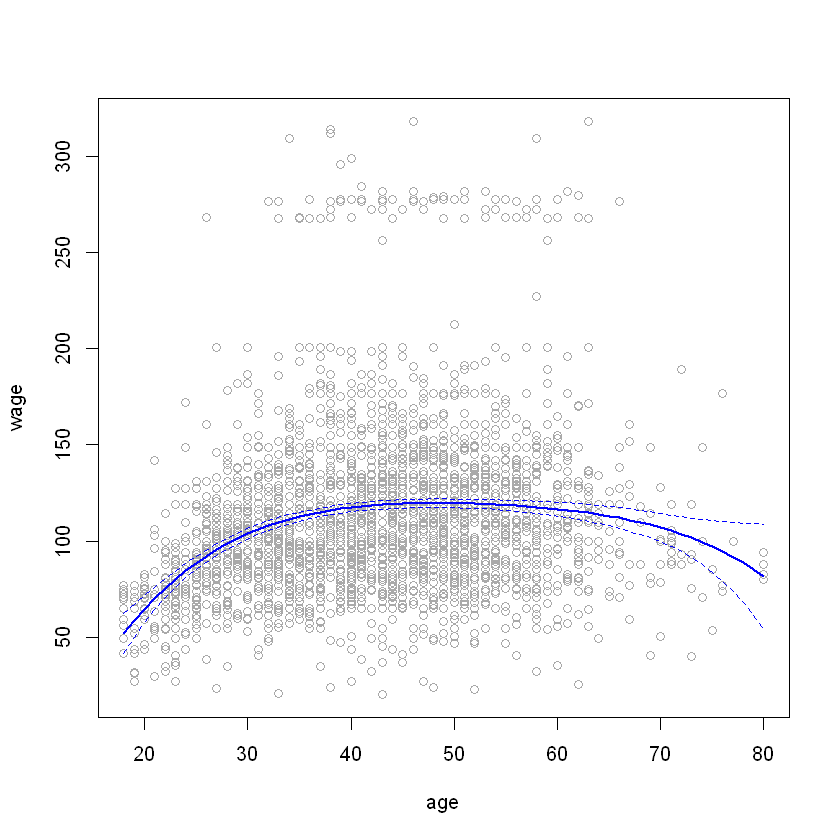

In [4]:
# The poly function generates a basis of orthogonal polynomials.
# Let's make a plot of the fitted function, along with the standard errors of the fit.
agelims <- range(age)
age.grid <- seq(from = agelims[1], to = agelims[2])
preds <- predict(fit, newdata = list(age = age.grid), se = TRUE)
se.bands <- cbind(preds$fit + 2 * preds$se, preds$fit - 2 * preds$se)
plot(age, wage, col = "darkgrey")
lines(age.grid, preds$fit, lwd = 2, col = "blue")
matlines(age.grid, se.bands, col = "blue", lty = 2)

In [5]:
# There are other more direct ways of doing this in R. For ex:
# I is the identity function, because the caret ^ does not mean squared in a formula.
fita <- lm(wage ~ age + I(age^2) + I(age^3) + I(age^4), data = Wage)
# 4 variables with different p-values from what we saw before. The thing we are interested
# in is the fitted polynomial and that has not changed.
summary(fita)


Call:
lm(formula = wage ~ age + I(age^2) + I(age^3) + I(age^4), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.707 -24.626  -4.993  15.217 203.693 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.842e+02  6.004e+01  -3.067 0.002180 ** 
age          2.125e+01  5.887e+00   3.609 0.000312 ***
I(age^2)    -5.639e-01  2.061e-01  -2.736 0.006261 ** 
I(age^3)     6.811e-03  3.066e-03   2.221 0.026398 *  
I(age^4)    -3.204e-05  1.641e-05  -1.952 0.051039 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.91 on 2995 degrees of freedom
Multiple R-squared:  0.08626,	Adjusted R-squared:  0.08504 
F-statistic: 70.69 on 4 and 2995 DF,  p-value: < 2.2e-16



Call:
lm(formula = wage ~ poly(age, 4), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.707 -24.626  -4.993  15.217 203.693 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    111.7036     0.7287 153.283  < 2e-16 ***
poly(age, 4)1  447.0679    39.9148  11.201  < 2e-16 ***
poly(age, 4)2 -478.3158    39.9148 -11.983  < 2e-16 ***
poly(age, 4)3  125.5217    39.9148   3.145  0.00168 ** 
poly(age, 4)4  -77.9112    39.9148  -1.952  0.05104 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.91 on 2995 degrees of freedom
Multiple R-squared:  0.08626,	Adjusted R-squared:  0.08504 
F-statistic: 70.69 on 4 and 2995 DF,  p-value: < 2.2e-16


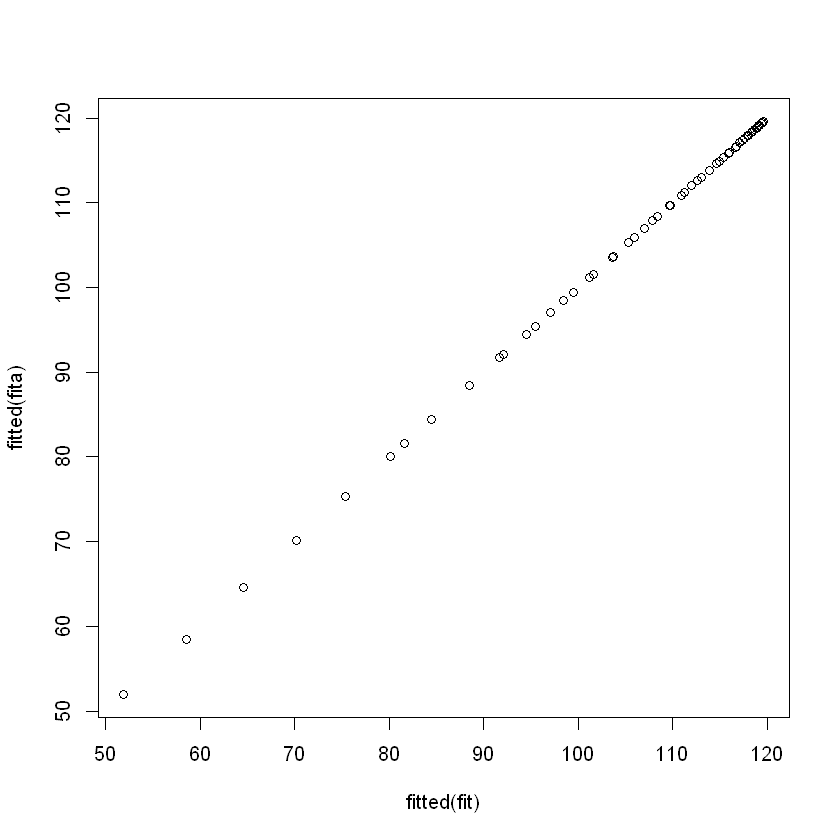

In [7]:
# By using orthogonal polynomials in this simpley way,
# turns out that we can separately test
# for each coefficient. so if we look at the summary again,
# we can see that the linear, quadratic
# and cubic terms are significant, but not the quadratic.
plot(fitted(fit), fitted(fita))
# And again, if we look at the summary of the fit, we can
# separately look at the significance of each of those
# coefficients and decide which ones are not needed.
# In this case, it was just the cubic.
summary(fit)


In [9]:
fita <- lm(wage ~ education, data = Wage)
fitb <- lm(wage ~ education + age, data = Wage)
fitc <- lm(wage ~ education + poly(age, 2), data = Wage)
fitd <- lm(wage ~ education + poly(age, 3), data = Wage)
# anova tells us that because Pr(>F) certainly, age is needed in the model with education.
# also age squared is certainly needed as well as age in the model.
# But age cubed is not necessarily needed. It's not quite significant.
anova(fita, fitb, fitc, fitd)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2995,3995721,NA,NA,NA,NA
2,2994,3867992,1,127728.88,102.737760,9.215004e-24
3,2993,3725395,1,142597.10,114.696898,2.728971e-26
4,2992,3719809,1,5586.66,4.493588,3.410431e-02


In [11]:
fit <- glm(I(wage > 250) ~ poly(age, 3), data = Wage, family = binomial)
summary(fit)


Call:
glm(formula = I(wage > 250) ~ poly(age, 3), family = binomial, 
    data = Wage)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.2808  -0.2736  -0.2487  -0.1758   3.2868  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -3.8486     0.1597 -24.100  < 2e-16 ***
poly(age, 3)1  37.8846    11.4818   3.300 0.000968 ***
poly(age, 3)2 -29.5129    10.5626  -2.794 0.005205 ** 
poly(age, 3)3   9.7966     8.9990   1.089 0.276317    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 730.53  on 2999  degrees of freedom
Residual deviance: 707.92  on 2996  degrees of freedom
AIC: 715.92

Number of Fisher Scoring iterations: 8


In [15]:
preds <- predict(fit, list(age = age.grid), se = T)
# These are two vectors of length, n. If you include a scalar like 0 in cbind,
# it'll just replicate it n times.
se.bands <- preds$fit + cbind(fit = 0, lower = -2 * preds$se, upper = 2 * preds$se)
se.bands[1:5, ]


,fit,lower,upper
1,-7.664756,-10.759826,-4.569686
2,-7.324776,-10.106699,-4.542852
3,-7.001732,-9.492821,-4.510643
4,-6.695229,-8.917158,-4.473300
5,-6.404868,-8.378691,-4.431045


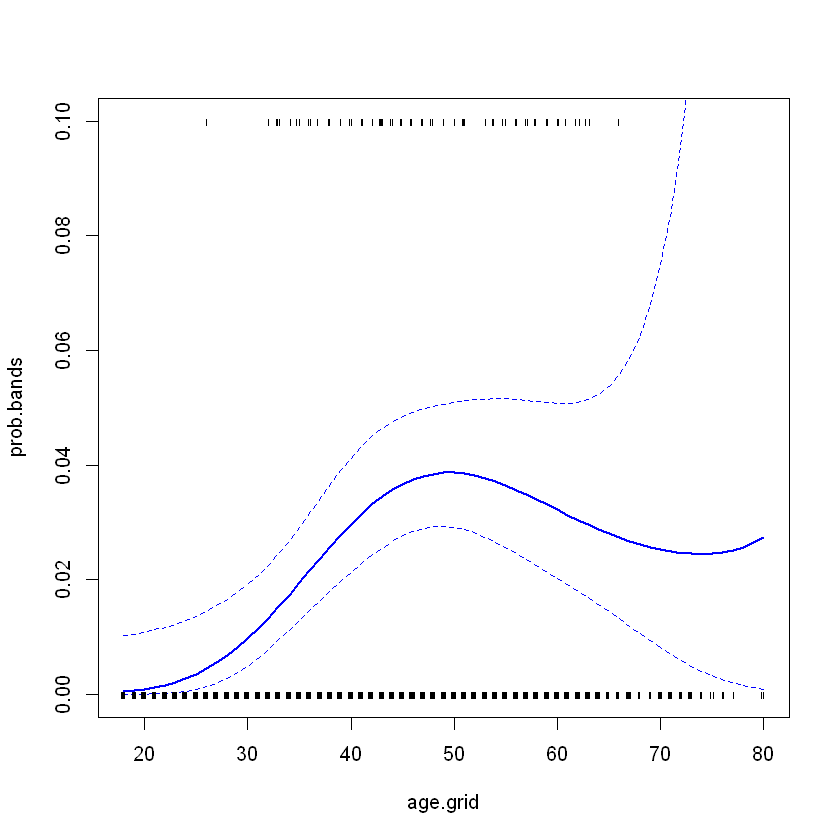

In [17]:
# We need to do the inverse logit It's going to do this simultaneously to all the
# elements of the matrix, and return a matrix for us
prob.bands <- exp(se.bands) / (1 + exp(se.bands))
# So we want to apply that transformation to both our
# fitted function, and the upper and lower standard error bands
# to transform them to the probability scale. I've limited the range here,
# because the standard error bands on were going to be very wide,
# and it would have squashed the plot down.
matplot(age.grid, prob.bands, col = "blue", lwd = c(2, 1, 1), lty = c(1, 2, 2), type = "l", ylim = c(0, .1))
# To give an indication of how much data occurred at each
# age, I used the jitter function, which randomly adds
# to each element of the vector age, a little bit of uniform
# random noise so you can get an idea of the density.
points(jitter(age), I(wage > 250) / 10, pch = "l", cex = .5)
